In [1]:
import numpy as np
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

Task 1, Part A

In [2]:
df_store = pd.DataFrame(pd.read_csv('store.csv'))
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
df_train = pd.DataFrame(pd.read_csv('train.csv'))
df_train.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [481]:
df_train.iloc[df_train['Sales'].agg(pd.Series.idxmax)][['Store', 'Date', 'Sales']]

Store           909
Date     2015-06-22
Sales         41551
Name: 44393, dtype: object

In [482]:
df_store.loc[df_store['CompetitionDistance'].agg(pd.Series.idxmax)]

Store                          453
StoreType                        a
Assortment                       c
CompetitionDistance          75860
CompetitionOpenSinceMonth      NaN
CompetitionOpenSinceYear       NaN
Promo2                           0
Promo2SinceWeek                NaN
Promo2SinceYear                NaN
PromoInterval                  NaN
Name: 452, dtype: object

In [483]:
df_store.loc[df_store['CompetitionDistance'].agg(pd.Series.idxmin)]

Store                                     516
StoreType                                   a
Assortment                                  c
CompetitionDistance                        20
CompetitionOpenSinceMonth                 NaN
CompetitionOpenSinceYear                  NaN
Promo2                                      1
Promo2SinceWeek                            35
Promo2SinceYear                          2010
PromoInterval                Mar,Jun,Sept,Dec
Name: 515, dtype: object

In [593]:
df = df_train[df_train['Open']==True].sort_values(["Store", "Date"], ascending = (True, True))
df = df.reset_index(drop=True)
i = 0
start = None
end = None
store = 1
intv = 0
while i<len(df):
    while i<len(df) and df.iloc[i]['Promo']==False: i+=1
    if i>=len(df): break
    curr_store = df.iloc[i]['Store']
    curr_start = i
    while i<len(df) and curr_store == df.iloc[i]['Store'] and df.iloc[i]['Promo']==True:
        i+=1
    curr_end = i
    if curr_end-curr_start>intv:
        start = curr_start
        end = curr_end
        store = curr_store
        intv = curr_end-curr_start      
    i+=1

In [594]:
print(start, end, store, end-start)

379854 379864 502 10


In [529]:
df.iloc[379853:379865]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,Month,Year
379853,502,6,2014-03-15,8396,1295,1,0,0,0,3,3,2014
379854,502,1,2014-03-17,13733,1757,1,1,0,0,3,3,2014
379855,502,2,2014-03-18,8245,1092,1,1,0,0,3,3,2014
379856,502,3,2014-03-19,12099,1599,1,1,0,0,3,3,2014
379857,502,4,2014-03-20,10385,1597,1,1,0,0,3,3,2014
379858,502,5,2014-03-21,8360,1222,1,1,0,0,3,3,2014
379859,502,1,2014-03-31,32368,3069,1,1,0,0,3,3,2014
379860,502,2,2014-04-01,21126,2445,1,1,0,0,4,4,2014
379861,502,3,2014-04-02,17144,2185,1,1,0,0,4,4,2014
379862,502,4,2014-04-03,15166,2034,1,1,0,0,4,4,2014


In [559]:
stat = pd.concat([df_train.set_index('Store'), df_store.set_index('Store')], 
          axis=1, join="inner").groupby(['Promo']).mean().sort_values('Sales', ascending = False)
stat['Sales']

Promo
1    7991.152046
0    4406.050805
Name: Sales, dtype: float64

In [563]:
diff = stat.iloc[0]['Sales'] - stat.iloc[1]['Sales']
print(diff)

3585.1012408091174


In [393]:
df_train[(df_train['Sales']>0) & (df_train['Open']==False)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [399]:
df_train[(df_train['Sales']==0) & (df_train['Open']==True)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0


In [407]:
pd.concat([df_train.set_index('Store'), df_store.set_index('Store')], 
          axis=1, join="inner").groupby(['StoreType']).sum().sort_values('Sales', ascending = False)

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
StoreType,,,,,,,,,,,,
a,2205558,3165334859,363541434,457077,210504,98413,2.845088e+09,2799319.0,783488024.0,257886,6101222.0,518830924.0
d,1251195,1765392943,156904995,258774,119286,55739,2.165997e+09,1458372.0,394492060.0,178508,4183924.0,359095630.0
c,547106,783221426,92129705,112978,52244,24653,4.812252e+08,697454.0,198749786.0,68258,1462148.0,137303804.0
b,63289,159231395,31465621,15563,6046,2916,1.687570e+07,56520.0,17021940.0,4526,100816.0,9109896.0


Task 1, Part B

<AxesSubplot:xlabel='Month'>

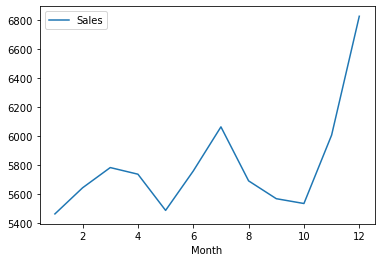

In [532]:
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month
df_train.groupby(['Month']).mean()[['Sales']].plot.line()

<AxesSubplot:xlabel='Date'>

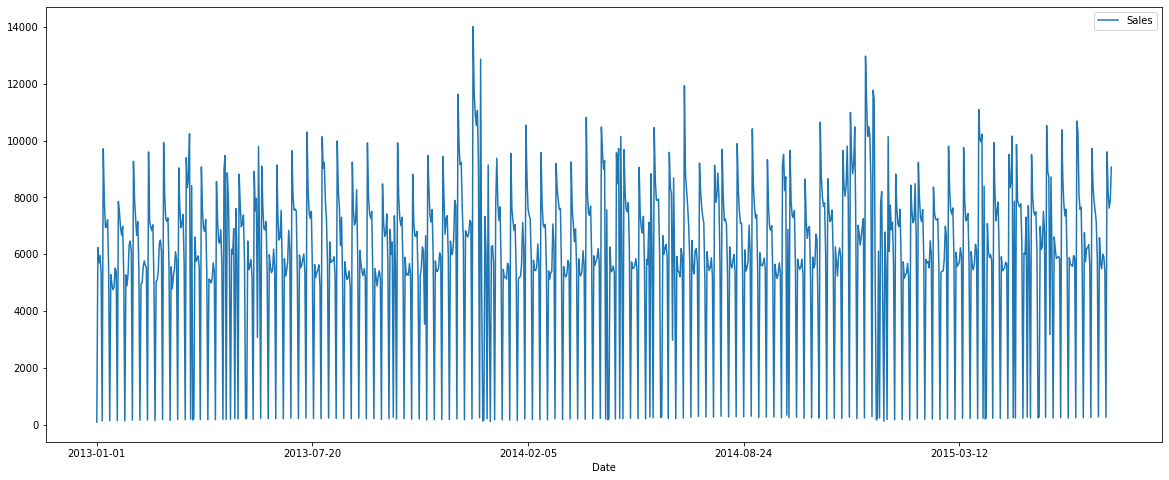

In [565]:
df_train.groupby(['Date']).mean()[['Sales']].plot.line(figsize=(20,8))

<AxesSubplot:xlabel='Day'>

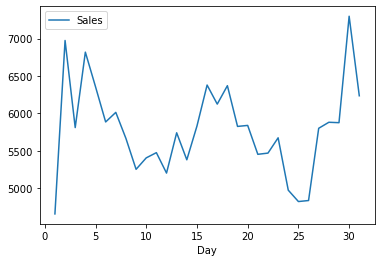

In [564]:
df_train['Day'] = pd.DatetimeIndex(df_train['Date']).day
df_train.groupby(['Day']).mean()[['Sales']].plot.line()

<AxesSubplot:xlabel='Date'>

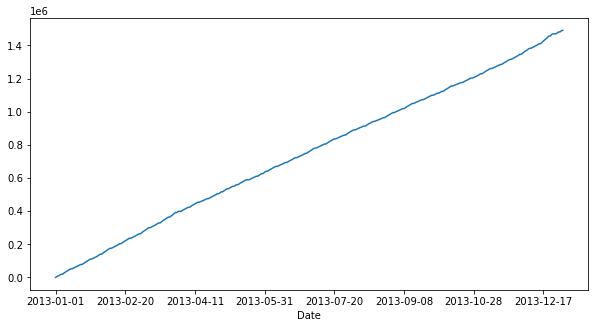

In [537]:
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year
df_train[(df_train['Store']==1) & (df_train['Year']==2013)].sort_values('Date')\
                .set_index('Date')['Sales'].cumsum().plot.line(figsize=(10,5))

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

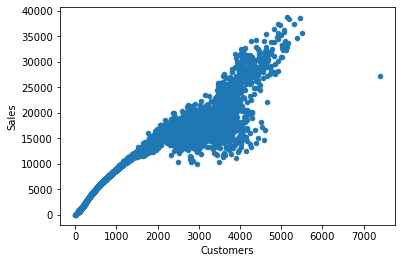

In [443]:
df_train.groupby(['Customers']).mean()[['Sales']].reset_index().plot.scatter(x = 'Customers', y = 'Sales')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

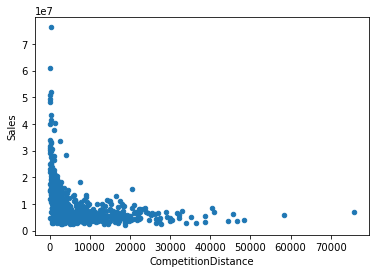

In [538]:
pd.concat([df_train.set_index('Store'), df_store.set_index('Store')], 
          axis=1, join="inner").groupby(['CompetitionDistance']).sum()[['Sales']].\
        reset_index().plot.scatter(x = 'CompetitionDistance', y = 'Sales')

In [480]:
corr = pd.concat([df_train.set_index('Store'), df_store.set_index('Store')], 
          axis=1, join="inner").corr(method='pearson')
corr.style.background_gradient(cmap='Purples')

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,month,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
DayOfWeek,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.005362,-0.005362,0.001937,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,0.048768,0.048768,0.023519,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,0.038179,0.038179,-0.001212,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.000681,-0.000681,-0.001009,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,-0.011747,-0.011747,0.024300,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,0.103282,0.103282,-0.036535,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
month,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,1.000000,1.000000,-0.269382,0.003578,-0.000624,0.003916,-0.025323,-0.026127,-0.007328
Month,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,1.000000,1.000000,-0.269382,0.003578,-0.000624,0.003916,-0.025323,-0.026127,-0.007328
Year,0.001937,0.023519,-0.001212,-0.001009,0.024300,-0.036535,-0.269382,-0.269382,1.000000,0.000703,-0.000121,0.000771,-0.004982,-0.005055,-0.001418
CompetitionDistance,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,0.003578,0.003578,0.000703,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695


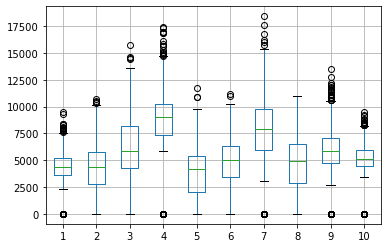

In [539]:
Store_10 = pd.pivot_table(df_train[(df_train['Store']<11)], values='Sales', index=['Date'], columns=['Store'])
boxplot = Store_10.boxplot(column=list(range(1,11)))

Task 2, Part A

In [546]:
#2A.1. Generating simple matrix X
mean, std, N = 2, 0.01, 100
col1 = np.ones(N)
col2 = np.random.normal(mean, std, size = (N,9))
X = np.column_stack((col1,col2))

In [547]:
#2A.2. Generating target vector Y
Y = np.random.uniform(0,5,N)

In [548]:
#2A.3. Calculating the values of b0 to b9 according to the normal equations formula
#formula: Beta = (X^T . X )^(-1) .( X^T . Y)
from numpy.linalg import inv

c = np.matmul(X.T, X)
d = np.matmul(X.T, Y)
b = np.matmul(inv(c), d)
print(b)

[-46.93853908 -10.56973417   7.57996305   4.38606441  17.19960578
  -6.37823928  10.97533349  -1.82368766  24.54059511 -21.09002316]


In [549]:
#2A.4. Implementing Gaussian Algorithm 
def Gaussian(X):
    for k in range(len(X[0]-1)):
        for i in range(k+1, len(X)):
            X[i,k]=X[i,k]/X[k,k]
            for j in range(k+1, len(X[0])):
                X[i,j]=X[i,j] - (X[i,k]*X[k,j])        

def Forward(X, Y):
    for k in range(len(X[0]-1)):
        for i in range(k+1, len(X)):
            Y[i]-=(X[i,k]*Y[k])
            
def Backward(X, Y):
    b = np.zeros(len(X[0]))
    for i in reversed(range(len(X[0]))):
        s = Y[i]
        for j in range(i+1, len(X[0])):
            s-=(X[i,j]*b[j])
        b[i] = s/X[i,i]
    return b

In [550]:
#Calculating the values of B using Gaussian Elimination Algorithm
c = np.matmul(X.T, X)
d = np.matmul(X.T, Y)
Gaussian(c)
Forward(c, d)
b_gauss = Backward(c, d)
print(b_gauss)

[-46.93853908 -10.56973417   7.57996305   4.38606441  17.19960578
  -6.37823928  10.97533349  -1.82368766  24.54059511 -21.09002316]


In [551]:
#2A.5. Predicting values of Y
Y_PR = np.matmul(X, b_gauss)
print(Y_PR)

[2.84851074 2.97917971 2.70664335 2.816856   3.56909487 3.02082899
 2.80683061 3.61038207 3.33013988 2.63523894 3.13282405 3.06321617
 3.075065   2.08569689 1.98404908 2.81875874 3.33406534 2.56273618
 2.60605169 2.7926283  2.48664071 2.31849801 1.76046009 2.21210314
 2.94489486 2.20906934 2.15033868 2.35777141 3.12312318 3.01593275
 2.74620346 2.09410346 2.52160576 2.64333554 2.81648088 1.67197626
 2.35480569 2.67926312 2.68406011 2.98031174 1.94271824 2.85296878
 2.7849836  2.9144446  3.15816043 2.74719127 2.30640358 2.61070594
 2.75650109 3.05676489 2.64873751 3.24935608 3.04239179 2.56332468
 2.84662974 2.7661193  2.7298146  2.57970851 2.69201862 2.52203821
 2.52649585 2.505268   2.55856852 3.86257558 2.70976696 2.63802788
 2.88416616 2.33652985 2.74354309 2.68664345 2.57003934 2.66182176
 2.52717552 3.47179482 2.68053701 2.94196986 3.65229463 2.80729986
 3.32595519 2.46660043 2.34737263 2.82452385 2.40256128 3.30061703
 2.78118923 2.76245816 3.00400294 2.76065217 2.66351935 2.6652

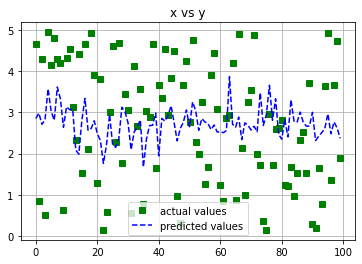

In [552]:
#2A.6. Plotting Y actual vs Y predicted
def plot_line_graph(X, Y, y_pred,mean,std):
    plt.plot(range(len(Y)), Y, 'gs', label='actual values')
    plt.plot(range(len(Y)), y_pred, 'b--', label='predicted values')
    plt.title('x vs y')
    plt.grid()
    plt.legend()
    plt.show()
    
plot_line_graph(X, Y, Y_PR,mean,std)

In [553]:
#2A.7. Predicting parameters using numpy.linalg.lstsq
b_lst = np.linalg.lstsq(X, Y, rcond = True)[0]
print(b_lst)

[-46.93853909 -10.56973417   7.57996305   4.38606441  17.19960578
  -6.37823928  10.97533349  -1.82368767  24.54059511 -21.09002316]


Task 2, Part B

In [4]:
#2B.A- #2B.B
table = pd.pivot_table(df_train, values='Sales', index=['Store'], columns=['Date'])
table = table.dropna()
table.head()

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0


In [5]:
#2B.C
X_train, Y_train = table.iloc[:800, :900], table.iloc[:800, 900:]
X_test, Y_test = table.iloc[800:, :900], table.iloc[800:, 900:]

print('X_train shape is ', X_train.shape)
print('Y_train shape is ', Y_train.shape)
print('X_test shape is ', X_test.shape)
print('Y_test shape is ', Y_test.shape)

X_train shape is  (800, 900)
Y_train shape is  (800, 42)
X_test shape is  (134, 900)
Y_test shape is  (134, 42)


In [6]:
#2B.D. To learn values of B
from numpy.linalg import inv
X = X_train.to_numpy()
Y = Y_train.to_numpy()
B = []

for i in range(len(Y[0])):
    c = np.matmul(X.T, X)
    d = np.matmul(X.T, Y[:,i])
    if type(c) is not np.ndarray: b = d/c
    else: b = np.matmul(inv(c), d)
    B.append(b)
print(np.array(B).shape)
print(np.array(B))

(42, 900)
[[ 5.13320000e+04 -8.04227591e+00  7.44016585e+00 ... -2.36734216e-01
   6.68170390e-02  2.06369073e-01]
 [ 9.74900000e+04 -1.11404071e+01  1.05280961e+01 ... -1.81898940e-09
  -2.22644303e-09  4.83123586e-09]
 [ 6.50060000e+04 -8.87080848e+00  8.76564517e+00 ...  8.91896896e-02
  -2.26316152e-01  3.60789846e-01]
 ...
 [ 6.89200000e+04 -9.47729660e+00  9.74245803e+00 ...  3.15155784e-01
   9.48066335e-02 -3.09873234e-01]
 [ 7.07600000e+04 -9.79891351e+00  1.03934427e+01 ...  1.54419152e-01
   6.96603059e-01  3.14630658e-01]
 [ 8.05820000e+04 -1.18647977e+01  1.15523690e+01 ... -4.37607797e-01
   8.61198933e-02  6.27760190e-01]]


In [572]:
def calculateErrors(Y_t, Y_PRED):
    RMSE, MAE = [], []
    for i in range(len(Y_t[0])):
        diff = np.subtract(Y_PRED[:,i], Y_t[:,i])
        rmse = np.power(np.matmul(diff.T, diff)/len(Y_t), 1/2)
        mae = np.sum(np.absolute(diff))
        RMSE.append(rmse)
        MAE.append(mae)
    return RMSE, MAE

In [578]:
#2B.E 
X_t = X_test.to_numpy()
Y_t = Y_test.to_numpy()
Y_PRED = []
Y_PRED = np.matmul(X_t, np.array(B).T)

#2B.F.
RMSE, MAE = calculateErrors(Y_t, Y_PRED)
print('Average RMSE:', np.mean(RMSE), 'Average MAE:', np.mean(MAE))
print('RMSE for 42 days prediction: ',RMSE)
print('MAE for 42 days prediction: ',MAE)

Average RMSE: 81450758.18183626 Average MAE: 1498387869.470166
RMSE for 42 days prediction:  [60838316.169844896, 91506814.82526764, 74427047.00834914, 69270691.081445, 68474742.7982184, 68171664.32154265, 73987632.36509635, 63935434.80730574, 94272603.84216654, 95468041.88574213, 97187360.10354397, 91710586.91941944, 90216553.98552242, 91817393.06894615, 66111600.444218814, 96355238.23093316, 81014169.55814461, 72735341.45405811, 75573049.93581627, 74194673.60930894, 77020482.60925543, 65149717.16777362, 99000645.23598593, 93120790.98736869, 87837606.56129208, 85598013.16564122, 84405156.59814063, 86352851.24520376, 68719330.54862797, 103220244.66510017, 77894081.39442275, 71720099.08602954, 70949315.25513808, 72671965.11090481, 74653621.26253302, 62644358.557929695, 99548462.46218506, 92622309.98534036, 85458864.34184057, 83210270.32519278, 85187108.67879589, 96677591.97753084]
MAE for 42 days prediction:  [1118155620.875035, 1680226539.073626, 1370542815.4948158, 1275625860.1887681,

In [579]:
#2B.G.g1
X_train, Y_train = table.iloc[:800, 899:941], table.iloc[:800, 900:]
X_test, Y_test = table.iloc[800:, 899:941], table.iloc[800:, 900:]

In [580]:
X = X_train.to_numpy()
Y = Y_train.to_numpy()
B = []

for i in range(len(Y[0])):
    c = np.matmul(X[:,i].T, X[:,i])
    d = np.matmul(X[:,i].T, Y[:,i])
    if type(c) is not np.ndarray: b = d/c
    else: b = np.matmul(inv(c), d)
    B.append(b)

In [581]:
X_t = X_test.to_numpy()
Y_t = Y_test.to_numpy()
Y_PRED = X_t*B

RMSE, MAE = calculateErrors(Y_t, Y_PRED)
print('Average RMSE:', np.mean(RMSE), 'Average MAE:', np.mean(MAE))
print('RMSE for 42 days prediction: ',RMSE)
print('MAE for 42 days prediction: ',MAE)

Average RMSE: 2076.783511828564 Average MAE: 234232.11722125666
RMSE for 42 days prediction:  [1539.121646239259, 1259.7387125087741, 6004.235698427, 700.230164419476, 573.2798916808547, 528.439164181309, 615.611582251879, 1504.333581903885, 1374.804771597934, 11226.53980422419, 1108.7292965908923, 1714.9046485736676, 738.1603826330522, 740.7351260923576, 1124.3074440412024, 1373.2753061045353, 7107.527201461547, 522.9864384915002, 730.7356422310315, 594.8314512723692, 732.7016981215953, 1424.236242142578, 1364.993374211858, 10427.8077687409, 822.6158571375446, 873.5473456205149, 792.463873657969, 709.2529408130526, 1341.1817007194134, 1455.5951790835147, 6837.338155938997, 560.010645424832, 642.8180875638915, 824.7254169457277, 658.2808943334876, 1453.2880144431904, 1432.9788432177547, 10197.062691499443, 803.9419945966326, 793.4894262257415, 836.5807528620293, 1157.4686385722837]
MAE for 42 days prediction:  [154933.57898106935, 70118.68392001037, 757657.6900361466, 72949.38459568562

In [582]:
#2B.G.g2
X_train, Y_train = table.iloc[:800, :900].mean(axis = 1), table.iloc[:800, 900:]
X_test, Y_test = table.iloc[800:, :900].mean(axis = 1), table.iloc[800:, 900:]

In [583]:
from numpy.linalg import inv
X = X_train.to_numpy()
Y = Y_train.to_numpy()
B = []

for i in range(len(Y[0])):
    c = np.matmul(X.T, X)
    d = np.matmul(X.T, Y[:,i])
    if type(c) is not np.ndarray: b = d/c
    else: b = np.matmul(inv(c), d)
    B.append(b)

In [584]:
X_t = X_test.to_numpy()
Y_t = Y_test.to_numpy()
Y_PRED = np.matmul(X_t.reshape([X_t.shape[0],1]),np.array(B).reshape([1, len(B)]))

RMSE, MAE = calculateErrors(Y_t, Y_PRED)
print('Average RMSE:', np.mean(RMSE), 'Average MAE:', np.mean(MAE))
print('RMSE for 42 days prediction: ',RMSE)
print('MAE for 42 days prediction: ',MAE)

Average RMSE: 1130.5362614043563 Average MAE: 106047.5176046094
RMSE for 42 days prediction:  [1518.7365543196356, 1259.8068795153893, 761.975379549389, 760.2237888481833, 692.6163215150287, 711.2636180880585, 715.4759345216478, 1505.6305106660072, 1372.1437142840798, 1648.4853646668384, 1805.6828651607689, 1122.5992688218926, 1107.9797600129116, 998.6196139853241, 1293.1890062149778, 1385.9294628168448, 962.6172090378176, 871.6443730125188, 882.5955005718592, 816.1084100331678, 856.2026013037678, 1448.2962792053245, 1366.7334258017145, 1430.626880734443, 1041.595068447585, 988.5813183757433, 905.3435598400246, 979.9059241654619, 1509.4687165025387, 1457.0232442374347, 924.5579861005548, 852.9203611393241, 816.2397902598086, 887.267086436188, 832.0996066139238, 1596.1293657785925, 1433.0135450620412, 1546.9810100191232, 1096.6278519325015, 983.3015750240467, 1057.5470095407602, 1278.7372368197282]
MAE for 42 days prediction:  [153029.56631880533, 82883.01339491524, 74862.78346819273, 7

In [585]:
#2B.G.g3
table2 = pd.pivot_table(df_train, values='Sales', index=['Store'], columns=['Date', 'DayOfWeek'])
table2.dropna()
table2.head()

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
DayOfWeek,2,3,4,5,6,7,1,2,3,4,...,3,4,5,6,7,1,2,3,4,5
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0


In [592]:
X_train, Y_train = table2.iloc[:800, :900].groupby(level=1, axis=1).mean(), table2.iloc[:800, 900:]
X_test, Y_test = table2.iloc[800:, :900].groupby(level=1, axis=1).mean(), table2.iloc[800:, 900:]
X_train.head()

DayOfWeek,1,2,3,4,5,6,7
Store,,,,,,,
1,4951.773438,4659.813953,4464.922481,4081.922481,4527.945736,4977.695312,0.0
2,5795.140625,5314.527132,5700.775194,4665.418605,4455.550388,2863.210938,0.0
3,7977.562500,7559.085271,6974.069767,6338.790698,6821.472868,4441.921875,0.0
4,10332.656250,9304.596899,8677.604651,8500.953488,8995.720930,10136.406250,0.0
5,5839.289062,5074.472868,5010.674419,4423.744186,4622.581395,2079.960938,0.0


In [588]:
from numpy.linalg import inv
X = X_train.to_numpy()
Y = Y_train.to_numpy()
B = []

for i in range(len(Y[0])):
    week = Y_train.columns[i][1]-1
    c = np.matmul(X[:,week].T, X[:,week])
    d = np.matmul(X[:,week].T, Y[:,i])
    if type(c) is not np.ndarray: b = d/c
    else: b = np.matmul(inv(c), d)
    B.append(b)

In [590]:
X_t = X_test.to_numpy()
Y_t = Y_test.to_numpy()
Y_PRED = []
for i in range(len(Y_t[0])):
    week = Y_test.columns[i][1]-1
    Y_PRED.append(X_t[:,week]*B[i])
Y_PRED = np.array(Y_PRED).T

RMSE, MAE = calculateErrors(Y_t, Y_PRED)
print('Average RMSE:', np.mean(RMSE), 'Average MAE:', np.mean(MAE))
print('RMSE for 42 days prediction: ',RMSE)
print('MAE for 42 days prediction: ',MAE)

Average RMSE: 1040.2556297911606 Average MAE: 195271.61904216273
RMSE for 42 days prediction:  [1030.792964584375, 165.60182406216498, 2084.7214411890277, 1411.385969318288, 849.1268902294809, 704.3211537769415, 666.6565301526323, 628.9076345425995, 217.49430538762581, 1423.1284770453767, 1571.8453861056712, 1186.1166046708827, 1107.9574899584456, 1140.4229256087501, 1163.7211199026187, 179.4564703246764, 1643.7215857958704, 1283.6595308241808, 1213.637775408492, 1032.3959280122467, 991.540022108263, 861.6281266196129, 197.2771928100864, 1435.6116745620889, 1156.5315840456444, 1165.9862261239334, 1206.8079770765673, 1196.6406314518647, 820.8525575304778, 301.67077161685575, 1501.584432268675, 1114.4627755530707, 939.9579623402431, 1140.5761004403314, 976.3332900323423, 1020.3444188636666, 316.6681737683579, 1567.7431209006136, 1313.8718364927604, 1164.95449437707, 1292.0762409471, 1302.544834398777]
MAE for 42 days prediction:  [163071.19344341088, 7454.899609981296, 245779.01130275318